In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,'../')
from m_argo_data import read_argo_data
from m_NCEP_read import read_NCEP
from m_WOA_data import read_WOA
from m_fonctions import watervapor
import numpy as np
import xarray as xr
import warnings
warnings.filterwarnings("ignore",category=RuntimeWarning)

rep_argo_data = '/Users/chemon/ARGO_NEW/NEW_LOCODOX/data_test/'
rep_NCEP_data = '/Users/chemon/ARGO_NEW/LOCODOX/DATA/LOCODOX_EXTERNAL_DATA/NCEP/'
num_float = '6902802' #'6902818'
z0q = 1e-4
ds_argo_inair, ds_argo_inwater,ds_argo_Sprof, optode_height, lauch_date = read_argo_data(num_float,rep_argo_data)
print(lauch_date)

2018-07-05T03:29:00.000000000


In [2]:
print(ds_argo_inair)

<xarray.Dataset>
Dimensions:       (N_MEASUREMENT: 1480)
Coordinates:
    LATITUDE      (N_MEASUREMENT) float64 59.62 59.62 59.62 ... 65.1 65.1 65.1
    LONGITUDE     (N_MEASUREMENT) float64 -38.96 -38.96 -38.96 ... -57.34 -57.34
Dimensions without coordinates: N_MEASUREMENT
Data variables:
    PPOX_DOXY     (N_MEASUREMENT) float32 198.7 199.7 199.0 ... 196.5 192.5
    TEMP          (N_MEASUREMENT) float32 6.175 6.158 6.192 ... 1.355 1.345
    PSAL          (N_MEASUREMENT) float32 0.003 27.06 27.03 ... 32.54 32.55
    JULD          (N_MEASUREMENT) datetime64[ns] 2018-07-05T03:39:45 ... 2022...
    CYCLE_NUMBER  (N_MEASUREMENT) float64 0.0 0.0 0.0 0.0 ... 158.0 158.0 158.0
Attributes:
    title:                        Argo float trajectory file
    institution:                  CORIOLIS
    source:                       Argo float
    history:                      2023-06-14T18:41:35Z creation; 2023-06-14T1...
    references:                   http://www.argodatamgt.org/Documentation
  

In [3]:
print(ds_argo_inwater)

<xarray.Dataset>
Dimensions:       (N_MEASUREMENT: 1470)
Coordinates:
    LATITUDE      (N_MEASUREMENT) float64 59.24 59.24 59.24 ... 65.1 65.1 65.1
    LONGITUDE     (N_MEASUREMENT) float64 -39.62 -39.62 -39.62 ... -57.34 -57.34
Dimensions without coordinates: N_MEASUREMENT
Data variables:
    PPOX_DOXY     (N_MEASUREMENT) float32 206.7 206.7 206.8 ... 193.6 194.0
    TEMP          (N_MEASUREMENT) float32 7.196 7.194 7.195 ... 1.378 1.378
    PSAL          (N_MEASUREMENT) float32 34.81 34.81 34.81 ... 32.54 32.54
    JULD          (N_MEASUREMENT) datetime64[ns] 2018-07-17T06:30:10 ... 2022...
    CYCLE_NUMBER  (N_MEASUREMENT) float64 2.0 2.0 2.0 2.0 ... 158.0 158.0 158.0
Attributes:
    title:                        Argo float trajectory file
    institution:                  CORIOLIS
    source:                       Argo float
    history:                      2023-06-14T18:41:35Z creation; 2023-06-14T1...
    references:                   http://www.argodatamgt.org/Documentation
  

In [4]:
#### print(optode_height) 

#
# On garde les cycles communs entre InWater et InAIR.
#
cycles_communs = xr.DataArray(np.intersect1d(ds_argo_inair['CYCLE_NUMBER'], ds_argo_inwater['CYCLE_NUMBER']), dims='N_CYCLE')
print(cycles_communs)

<xarray.DataArray (N_CYCLE: 147)>
array([  2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 151., 152., 153., 154.,
       155., 156.

In [5]:
print(ds_argo_inair['JULD'].values)
print(ds_argo_inwater['JULD'].values)


['2018-07-05T03:39:45.000000000' '2018-07-05T03:40:15.000000000'
 '2018-07-05T03:40:44.999999744' ... '2022-10-24T07:23:08.000000000'
 '2022-10-24T07:23:38.000000000' '2022-10-24T07:24:07.999999744']
['2018-07-17T06:30:10.000000000' '2018-07-17T06:30:40.000000256'
 '2018-07-17T06:31:10.000000000' ... '2022-10-24T07:12:54.000000000'
 '2022-10-24T07:13:24.000000000' '2022-10-24T07:13:53.999999744']


In [6]:
ds_argo_inair = ds_argo_inair.where(ds_argo_inair['CYCLE_NUMBER'].isin(cycles_communs), drop=True)
ds_argo_inwater = ds_argo_inwater.where(ds_argo_inwater['CYCLE_NUMBER'].isin(cycles_communs), drop=True)
print(ds_argo_inair['CYCLE_NUMBER'])
print(ds_argo_inwater['CYCLE_NUMBER'])

<xarray.DataArray 'CYCLE_NUMBER' (N_MEASUREMENT: 1470)>
array([  2.,   2.,   2., ..., 158., 158., 158.])
Coordinates:
    LATITUDE   (N_MEASUREMENT) float64 59.24 59.24 59.24 ... 65.1 65.1 65.1
    LONGITUDE  (N_MEASUREMENT) float64 -39.62 -39.62 -39.62 ... -57.34 -57.34
Dimensions without coordinates: N_MEASUREMENT
Attributes:
    long_name:    Float cycle number of the measurement
    conventions:  0...N, 0 : launch cycle, 1 : first complete cycle
    casted:       1
<xarray.DataArray 'CYCLE_NUMBER' (N_MEASUREMENT: 1470)>
array([  2.,   2.,   2., ..., 158., 158., 158.])
Coordinates:
    LATITUDE   (N_MEASUREMENT) float64 59.24 59.24 59.24 ... 65.1 65.1 65.1
    LONGITUDE  (N_MEASUREMENT) float64 -39.62 -39.62 -39.62 ... -57.34 -57.34
Dimensions without coordinates: N_MEASUREMENT
Attributes:
    long_name:    Float cycle number of the measurement
    conventions:  0...N, 0 : launch cycle, 1 : first complete cycle
    casted:       1


In [7]:
print(ds_argo_inair['JULD'][1:20].values)
print(ds_argo_inwater['JULD'][1:20].values)

['2018-07-17T06:40:56.000000256' '2018-07-17T06:41:26.000000000'
 '2018-07-17T06:41:56.000000000' '2018-07-17T06:42:26.000000256'
 '2018-07-17T06:42:56.000000000' '2018-07-17T06:43:26.000000000'
 '2018-07-17T06:43:56.000000000' '2018-07-17T06:44:26.000000256'
 '2018-07-17T06:44:56.000000000' '2018-08-06T06:36:41.000000000'
 '2018-08-06T06:37:11.000000000' '2018-08-06T06:37:40.999999744'
 '2018-08-06T06:38:11.000000000' '2018-08-06T06:38:41.000000000'
 '2018-08-06T06:39:10.999999744' '2018-08-06T06:39:41.000000000'
 '2018-08-06T06:40:11.000000000' '2018-08-06T06:40:41.000000000'
 '2018-08-06T06:41:11.000000000']
['2018-07-17T06:30:40.000000256' '2018-07-17T06:31:10.000000000'
 '2018-07-17T06:31:40.000000000' '2018-07-17T06:32:10.000000000'
 '2018-07-17T06:32:40.000000000' '2018-07-17T06:33:10.000000000'
 '2018-07-17T06:33:40.000000000' '2018-07-17T06:34:10.000000256'
 '2018-07-17T06:34:40.000000000' '2018-08-06T06:26:25.000000000'
 '2018-08-06T06:26:55.000000000' '2018-08-06T06:27:24.99

[34.813 34.815 34.811 ... 32.541 32.54  32.541]


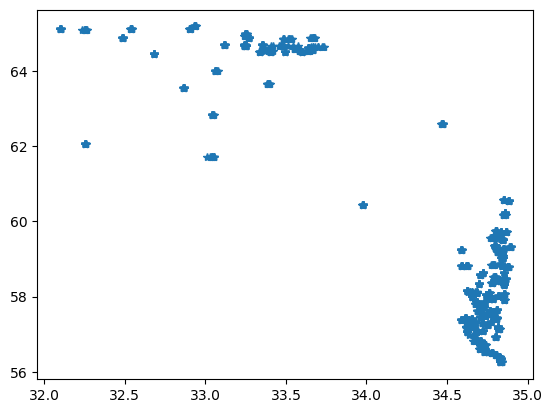

In [8]:
print(ds_argo_inwater['PSAL'].values)
plt.figure()
plt.plot(ds_argo_inwater['PSAL'].values,ds_argo_inwater['LATITUDE'].values,'*')
plt.show()

[9.953225  9.951835  9.952533  ... 6.6254897 6.6254926 6.6254897]
[30.]
0.0001


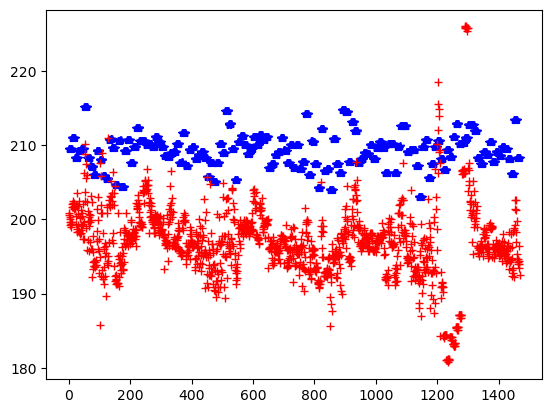

In [9]:
ds_NCEP_air,ds_NCEP_slp,ds_NCEP_rhum = read_NCEP(rep_NCEP_data,ds_argo_inair['LONGITUDE'],ds_argo_inair['LATITUDE'],ds_argo_inair['JULD'])

ds_NCEP_air

#ds_NCEP_air = ds_NCEP_air.interp(lat=ds_argo_inair['LATITUDE'],lon=ds_argo_inair['LONGITUDE'],time=ds_argo_inair['JULD'])
#ds_NCEP_air

	#
	# Interpolation des donnees NCEP aux dates/positions flotteurs.
	#
#air_interp = ds_NCEP_air['air'].interp(lat=ds_argo_inair['LATITUDE'],lon=ds_argo_inair['LONGITUDE'],time=ds_argo_inair['JULD'])
#rhum_interp = ds_NCEP_rhum['rhum'].interp(lat=ds_argo_inair['LATITUDE'],lon=ds_argo_inair['LONGITUDE'],time=ds_argo_inair['JULD'])
#slp_interp = ds_NCEP_slp['slp'].interp(lat=ds_argo_inair['LATITUDE'],lon=ds_argo_inair['LONGITUDE'],time=ds_argo_inair['JULD'])
#slp_interp = slp_interp/100 # Passage de Pascal en HectoPascal/Millibar
#air_interp = air_interp - 273.15 # Passage Kelvin vers Celsius

bid=watervapor(ds_argo_inwater['TEMP'],ds_argo_inwater['PSAL'])
SSph20 = bid * 1013.25 #mbar, seasurface water vapor pressure
print(SSph20.values)

print(np.abs(optode_height)*100)
print(z0q)

ncep_phum = watervapor(ds_NCEP_air['air'].values,0) * ds_NCEP_rhum['rhum'].values/100*1013.25 #ncep water vapor pressure
ncep_phum_optode_height = (SSph20.values + (ncep_phum - SSph20.values) * np.log(np.abs(optode_height)*100/z0q)/np.log(10/z0q))
ncep_Po2 = (ds_NCEP_slp['slp'].values - ncep_phum_optode_height) * 0.20946

#ncep_phum = watervapor(air_interp.values,0) * rhum_interp.values/100*1013.25 #ncep water vapor pressure
#ncep_phum_optode_height = (SSph20.values + (ncep_phum - SSph20.values) * np.log(np.abs(optode_height)*100/z0q)/np.log(10/z0q))
#ncep_Po2 = (slp_interp.values - ncep_phum_optode_height) * 0.20946

plt.figure()
plt.plot(ncep_Po2,'*b')
plt.plot(ds_argo_inair['PPOX_DOXY'],'r+')

In [10]:
np.mean(ncep_Po2/ds_argo_inair['PPOX_DOXY']).values



array(1.06263537)

In [11]:
ds_argo_Sprof

<xarray.Dataset>
Dimensions:                       (N_PROF: 159, N_PARAM: 4, N_CALIB: 2,
                                   N_LEVELS: 2005)
Dimensions without coordinates: N_PROF, N_PARAM, N_CALIB, N_LEVELS
Data variables: (12/58)
    DATA_TYPE                     <U32 ...
    FORMAT_VERSION                <U4 ...
    HANDBOOK_VERSION              <U4 ...
    REFERENCE_DATE_TIME           datetime64[ns] ...
    DATE_CREATION                 datetime64[ns] ...
    DATE_UPDATE                   datetime64[ns] ...
    ...                            ...
    DOXY                          (N_PROF, N_LEVELS) float32 ...
    DOXY_QC                       (N_PROF, N_LEVELS) int64 ...
    DOXY_dPRES                    (N_PROF, N_LEVELS) float32 ...
    DOXY_ADJUSTED                 (N_PROF, N_LEVELS) float32 ...
    DOXY_ADJUSTED_QC              (N_PROF, N_LEVELS) int64 ...
    DOXY_ADJUSTED_ERROR           (N_PROF, N_LEVELS) float32 ...
Attributes:
    title:                Argo float vertical profile
    institution:          CORIOLIS
    source:               Argo float
    history:              2023-03-20T16:17:04Z creation (software version 1.1...
    references:           http://www.argodatamgt.org/Documentation
    user_manual_version:  1.0
    Conventions:          Argo-3.1 CF-1.6
    featureType:          trajectoryProfile
    software_version:     1.15 (version 09.06.2022 for ARGO_simplified_profile)

In [12]:
#from scipy.optimize import curve_fit
#print(lauch_date)
#print(ds_argo_inair['JULD'][0].values)
#toto = (ds_argo_inair['JULD'].values - lauch_date)
#print(type(toto))
#tutu = toto.astype(float)
#print(tutu)
#print(tutu/1e9/86400)

In [13]:
from scipy.optimize import curve_fit

PPOX1 = ds_argo_inair['PPOX_DOXY'].values
PPOX2 = ds_argo_inwater['PPOX_DOXY'].values

def model(X,G, C):
    return G / (1-C) * (X - C * PPOX2) # C : Carry-over

# Ajustement des paramètres G et D
initial_guess = [1, 0]  # Valeurs initiales pour G et D
params, covariance = curve_fit(model, PPOX1, ncep_Po2, p0=initial_guess)

# Extraction des résultats
G_estime, C_estime = params
print(G_estime)

1.0613510365267163


In [14]:
delta_T = (ds_argo_inair['JULD'].values - lauch_date)
delta_T = delta_T.astype(float)
delta_T = delta_T/1e9/86400 # Difference en jour

def model(X,G,C,D):
    return (G / (1-C) * (1 + D / 100 * delta_T/365) * (X - C * PPOX2) )# C : Carry-over

# Ajustement des paramètres G et D
initial_guess = [1, 0, 0]  # Valeurs initiales pour G et D
params, covariance = curve_fit(model, PPOX1, ncep_Po2, p0=initial_guess)

# Extraction des résultats
G_estime, C_estime, D_estime = params
print(G_estime)
print(D_estime)

1.051223446239205
0.42303019994202834


1.0510655003357154
0.43215761954081794


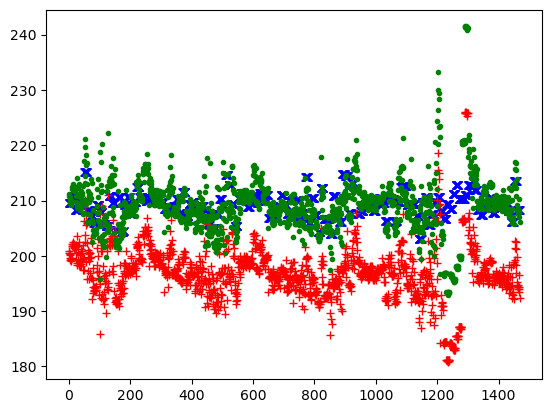

In [15]:
from scipy.optimize import curve_fit

PPOX1 = ds_argo_inair['PPOX_DOXY'].values

def model(delta_T, G, D):
    return G * (1 + D / 100 * delta_T/365) * PPOX1 # Sans carry-over

# Ajustement des paramètres G et D
initial_guess = [1, 0]  # Valeurs initiales pour G et D
delta_T = (ds_argo_inair['JULD'].values - lauch_date)
delta_T = delta_T.astype(float)
delta_T = delta_T/1e9/86400 # Difference en jour
#print(delta_T)
params, covariance = curve_fit(model, delta_T, ncep_Po2, p0=initial_guess)

# Extraction des résultats
G_estime, D_estime = params

print(G_estime)
print(D_estime)
plt.figure()
plt.plot(ncep_Po2,'xb')
plt.plot(PPOX1,'+r')
plt.plot(G_estime * (1 + D_estime/100 * delta_T/365) * PPOX1,'.g')
plt.show()

In [16]:
print(G_estime * (1+D_estime/100*delta_T[0]/365)*PPOX1[0])
print(1.0513 * (1+0.389/100*delta_T[0]/365)*PPOX1[0])

211.1129703345233
211.15704216826987


D1_estime : [1.44487591e-05 1.05052160e+00]
[0.99893347]
210.78357585294117


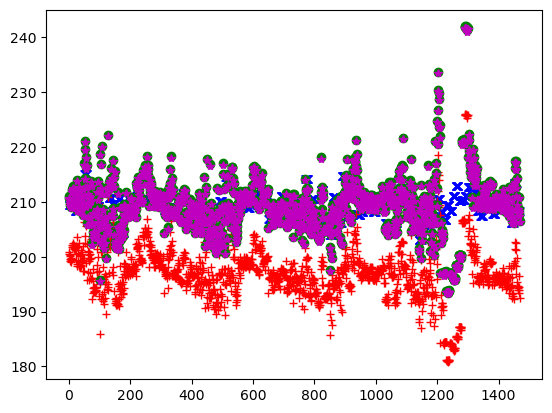

In [17]:
#def model(deta_T,D):
#    return  D * delta_T
    
#initial_guess = 0
#params, covariance = curve_fit(model, delta_T, ncep_Po2-PPOX1, p0=initial_guess)
#D1_estime = params
#print(D1_estime)

#def model(X,D):
#    return D * X * PPOX1
    
#initial_guess = 1
#params, covariance = curve_fit(model, delta_T,ncep_Po2,  p0=initial_guess)
#D1_estime = params
#print(D1_estime)  

D1_estime = np.polyfit(delta_T,ncep_Po2/PPOX1,1)
print(f'D1_estime : {D1_estime}')

plt.figure()
plt.plot(ncep_Po2,'xb')
plt.plot(PPOX1,'+r')
plt.plot(np.polyval(D1_estime,delta_T)*PPOX1,'og')

def model(X,G):
    return X * G
    
initial_guess = 1
#params, covariance = curve_fit(model, PPOX1+D1_estime*delta_T, ncep_Po2, p0=initial_guess)
params, covariance = curve_fit(model, np.polyval(D1_estime,delta_T)*PPOX1, ncep_Po2, p0=initial_guess)

G1_estime = params
print(G1_estime)   

bid = G1_estime*np.polyval(D1_estime,delta_T)*PPOX1
print(bid[0])
plt.plot(G1_estime*np.polyval(D1_estime,delta_T)*PPOX1,'*m')
plt.show()

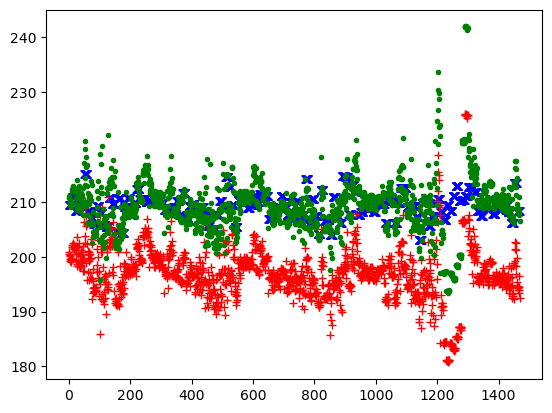

In [18]:
plt.figure()
plt.plot(ncep_Po2,'xb')
plt.plot(PPOX1,'+r')
plt.plot(np.polyval(D1_estime,delta_T)*PPOX1,'.g')

#Z=np.polyval(D1_estime,delta_T)*np.arange(0,1470)
#plt.plot(Z,'ok')
plt.show()


1.0494011825574538
0.5020170052987872


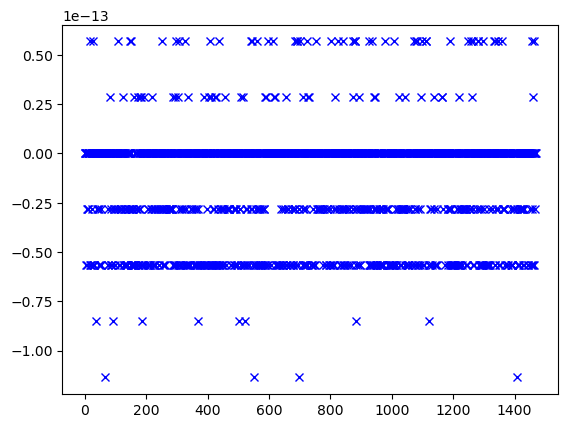

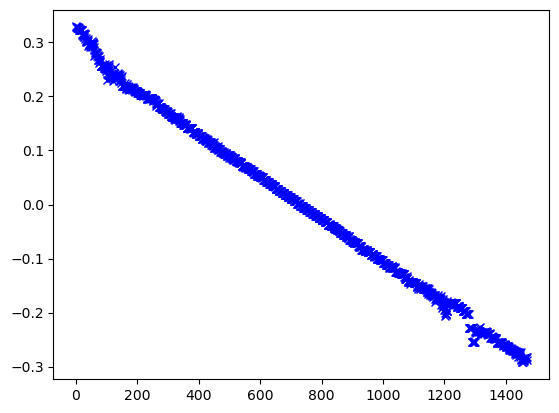

210.78357585294117
211.15704216826987
211.1129702657217


In [19]:
#PPOX1_bis = G1_estime * (PPOX1 + D1_estime*delta_T)
#PPOX1_bis = G1_estime*np.polyval(D1_estime,delta_T)*PPOX1


def model(delta_T, G, D):
    return G * (1 + D / 100 * delta_T/365) * PPOX1 # Sans carry-over

initial_guess = [1, 0]  # Valeurs initiales pour G et D
params, covariance = curve_fit(model, delta_T, G1_estime*np.polyval(D1_estime,delta_T)*PPOX1, p0=initial_guess)

# Extraction des résultats
G_estime, D_estime = params
print(G_estime)
print(D_estime)

plt.figure()
plt.plot(G1_estime*np.polyval(D1_estime,delta_T)*PPOX1 - G_estime * (1 + D_estime / 100 * delta_T/365) * PPOX1,'xb')
plt.show()
#print(delta_T[0])
plt.figure()
G2=1.0510655003357154
D2 = 0.43215761954081794
plt.plot( G2 * (1 + D2 / 100 * delta_T/365) * PPOX1- G_estime * (1 + D_estime / 100 * delta_T/365) * PPOX1,'xb')
plt.show()
print(G_estime * (1+D_estime/100*delta_T[0]/365)*PPOX1[0])
print(1.0513 * (1+0.389/100*delta_T[0]/365)*PPOX1[0])
print(1.0510655 * (1+0.4321576/100*delta_T[0]/365)*PPOX1[0])

In [20]:
fic_WOA = '/Users/chemon/ARGO_NEW/LOCODOX/DATA/LOCODOX_EXTERNAL_DATA/WOA/WOA2018_DECAV_monthly_5500_1deg.nc'
ds_woa = read_WOA(fic_WOA,ds_argo_inair['LONGITUDE'],ds_argo_inair['LATITUDE'],ds_argo_inair['JULD'])

In [32]:
ds_woa2 = xr.open_dataset(fic_WOA)
ds_woa2['time'][-1]
ds_woa2

<xarray.Dataset>
Dimensions:    (lat: 180, lon: 360, Depth: 102, time: 12)
Coordinates:
  * Depth      (Depth) float64 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
  * time       (time) float64 15.0 46.0 75.0 106.0 ... 259.0 289.0 320.0 350.0
Dimensions without coordinates: lat, lon
Data variables:
    latitude   (lat) float64 ...
    longitude  (lon) float64 ...
    doxywoa    (time, Depth, lat, lon) float64 ...
    Psatwoa    (time, Depth, lat, lon) float64 ...
    density    (time, Depth, lat, lon) float64 ...
    preswoa    (time, Depth, lat, lon) float64 ...
    PSAL_WOA   (time, Depth, lat, lon) float64 ...
    TEMP_WOA   (time, Depth, lat, lon) float64 ...

In [31]:
ds_woa2 = ds_woa2.reset_coords(names='Depth',drop=False)
ds_woa2

ValueError: cannot remove index coordinates with reset_coords: {'Depth'}

In [45]:
def extend_time_dimension_all_variables(ds):
    """
    Étend la dimension `time` en ajoutant un premier et un dernier élément dupliqués
    pour toutes les variables ayant la dimension `time` dans un dataset xarray.
    
    Parameters:
        ds (xarray.Dataset): Le dataset à modifier.
    
    Returns:
        xarray.Dataset: Le dataset avec la dimension `time` étendue.
    """
    if "time" not in ds.dims:
        raise ValueError("La dimension 'time' n'existe pas dans le dataset.")
    
    # Identifier les variables ayant la dimension `time`
    variables_to_extend = [var for var in ds.data_vars if "time" in ds[var].dims]
    
    # Créer la nouvelle coordonnée `time`
    original_time = ds["time"]
    extended_time = xr.concat([
        original_time[-1] - 365.25,  # Avant le premier temps
        original_time,
        original_time[0] + 365.25 # Après le dernier temps
    ], dim="time")
    
    # Étendre chaque variable
    extended_data_vars = {}
    for var in variables_to_extend:
        data = ds[var]
        # Dupliquer le premier et le dernier élément
        first = data.isel(time=0)
        last = data.isel(time=-1)
        extended_data = xr.concat([first, data, last], dim="time")
        extended_data_vars[var] = extended_data
    
    # Créer un nouveau dataset avec les données étendues
    ds_extended = xr.Dataset(
        data_vars={var: extended_data_vars[var] for var in extended_data_vars},
#        coords={**ds.coords, "time": extended_time}
    )
    
    return ds_extended

# Exemple : Charger le dataset xarray
ds = xr.open_dataset(fic_WOA)

# Étendre la dimension `time` pour toutes les variables pertinentes
ds_extended = extend_time_dimension_all_variables(ds)
original_time = ds["time"]
extended_time = xr.concat([
        original_time[-1]-365.25,  # Avant le premier temps
        original_time,
        original_time[0]+365.25  # Après le dernier temps
    ], dim="time")
ds_extended = ds_extended.assign_coords(time=("time",extended_time.values))
ds_extended

<xarray.Dataset>
Dimensions:   (Depth: 102, time: 14, lat: 180, lon: 360)
Coordinates:
  * Depth     (Depth) float64 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
  * time      (time) float64 -15.25 15.0 46.0 75.0 ... 289.0 320.0 350.0 380.2
Dimensions without coordinates: lat, lon
Data variables:
    doxywoa   (Depth, lat, lon, time) float64 nan nan nan nan ... nan nan nan
    Psatwoa   (Depth, lat, lon, time) float64 nan nan nan nan ... nan nan nan
    density   (Depth, lat, lon, time) float64 nan nan nan nan ... nan nan nan
    preswoa   (Depth, lat, lon, time) float64 nan nan nan nan ... nan nan nan
    PSAL_WOA  (Depth, lat, lon, time) float64 nan nan nan nan ... nan nan nan
    TEMP_WOA  (Depth, lat, lon, time) float64 nan nan nan nan ... nan nan nan

In [22]:

# Exemple : Charger le dataset xarray
# ds = xr.open_dataset("chemin_vers_votre_fichier.nc")

def extend_time_dimension_all_variables(ds):
    """
    Étend la dimension `time` en dupliquant le premier et le dernier élément
    pour toutes les variables ayant la dimension `time` dans un dataset xarray.
    
    Parameters:
        ds (xarray.Dataset): Le dataset à modifier.
    
    Returns:
        xarray.Dataset: Le dataset avec la dimension `time` étendue.
    """
    # Vérifier que la dimension `time` existe
    if "time" not in ds.dims:
        raise ValueError("La dimension 'time' n'existe pas dans le dataset.")
    
    # Identifier les variables ayant la dimension `time`
    variables_to_extend = [
        var for var in ds.data_vars if "time" in ds[var].dims
    ]
    
    # Étendre chaque variable
    extended_variables = {}
    for var in variables_to_extend:
        # Extraire la variable
        data = ds[var]
        
        # Dupliquer le premier et le dernier élément
        first = data.isel(time=0)
        last = data.isel(time=-1)
        extended_data = xr.concat([first, data, last], dim="time")
        
        extended_variables[var] = extended_data
    
    # Étendre les coordonnées temporelles
    new_time = xr.concat([
        ds["time"].isel(time=0) - 1,  # Avant le premier
        ds["time"],                  # Original
        ds["time"].isel(time=-1) + 1 # Après le dernier
    ], dim="time")
    
    # Créer un nouveau dataset avec les variables étendues
    ds_extended = ds.copy()
    for var, data in extended_variables.items():
        ds_extended[var] = data.assign_coords(time=new_time)
    
    return ds_extended

# Étendre la dimension time pour toutes les variables pertinentes
ds_extended = extend_time_dimension_all_variables(ds_woa2)

ds_extended


<xarray.Dataset>
Dimensions:    (Depth: 102, time: 12, lat: 180, lon: 360)
Coordinates:
  * Depth      (Depth) float64 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
  * time       (time) float64 15.0 46.0 75.0 106.0 ... 259.0 289.0 320.0 350.0
Dimensions without coordinates: lat, lon
Data variables:
    latitude   (lat) float64 ...
    longitude  (lon) float64 ...
    doxywoa    (Depth, lat, lon, time) float64 nan nan nan nan ... nan nan nan
    Psatwoa    (Depth, lat, lon, time) float64 nan nan nan nan ... nan nan nan
    density    (Depth, lat, lon, time) float64 nan nan nan nan ... nan nan nan
    preswoa    (Depth, lat, lon, time) float64 nan nan nan nan ... nan nan nan
    PSAL_WOA   (Depth, lat, lon, time) float64 nan nan nan nan ... nan nan nan
    TEMP_WOA   (Depth, lat, lon, time) float64 nan nan nan nan ... nan nan nan

In [25]:
ds_woa3 = ds_woa2.copy()
new_time = xr.concat([ds_woa2['time'][-1]-365.25,ds_woa2['time'],ds_woa2['time'][0]+365.25],dim='time')
print(new_time)
for var in ds_woa.data_vars:
    print(f'test {var}')
    if "Depth" in ds_woa2[var].dims:
#        print(f'je passe dans boucle')
        val1 = ds_woa2[var].isel(time=0)
#        print(f'val1 : {val1.values}')
        val_end = ds_woa2[var].isel(time=-1)
        merdum=xr.concat([val1,ds_woa2[var],val_end],dim='time')
        merdum =merdum.assign_coords(time=new_time)
        ds_woa3[var]= merdum
ds_woa3        

<xarray.DataArray 'time' (time: 14)>
array([-15.25,  15.  ,  46.  ,  75.  , 106.  , 136.  , 167.  , 197.  ,
       228.  , 259.  , 289.  , 320.  , 350.  , 380.25])
Coordinates:
  * time     (time) float64 350.0 15.0 46.0 75.0 ... 289.0 320.0 350.0 15.0
test latitude
test longitude
test doxywoa
test Psatwoa
test density
test preswoa
test PSAL_WOA
test TEMP_WOA


<xarray.Dataset>
Dimensions:    (Depth: 102, time: 12, lat: 180, lon: 360)
Coordinates:
  * Depth      (Depth) float64 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
  * time       (time) float64 15.0 46.0 75.0 106.0 ... 259.0 289.0 320.0 350.0
Dimensions without coordinates: lat, lon
Data variables:
    latitude   (lat) float64 ...
    longitude  (lon) float64 ...
    doxywoa    (Depth, lat, lon, time) float64 nan nan nan nan ... nan nan nan
    Psatwoa    (Depth, lat, lon, time) float64 nan nan nan nan ... nan nan nan
    density    (Depth, lat, lon, time) float64 nan nan nan nan ... nan nan nan
    preswoa    (Depth, lat, lon, time) float64 nan nan nan nan ... nan nan nan
    PSAL_WOA   (Depth, lat, lon, time) float64 nan nan nan nan ... nan nan nan
    TEMP_WOA   (Depth, lat, lon, time) float64 nan nan nan nan ... nan nan nan

In [105]:
ds_woa3        

<xarray.Dataset>
Dimensions:    (Depth: 102, time: 12, lat: 180, lon: 360)
Coordinates:
  * Depth      (Depth) float64 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
  * time       (time) float64 15.0 46.0 75.0 106.0 ... 259.0 289.0 320.0 350.0
Dimensions without coordinates: lat, lon
Data variables:
    latitude   (lat) float64 ...
    longitude  (lon) float64 ...
    doxywoa    (Depth, lat, lon, time) float64 nan nan nan nan ... nan nan nan
    Psatwoa    (Depth, lat, lon, time) float64 nan nan nan nan ... nan nan nan
    density    (Depth, lat, lon, time) float64 nan nan nan nan ... nan nan nan
    preswoa    (Depth, lat, lon, time) float64 nan nan nan nan ... nan nan nan
    PSAL_WOA   (Depth, lat, lon, time) float64 nan nan nan nan ... nan nan nan
    TEMP_WOA   (Depth, lat, lon, time) float64 nan nan nan nan ... nan nan nan

In [15]:
ds_woa

<xarray.Dataset>
Dimensions:    (N_MEASUREMENT: 1470, Depth: 102)
Coordinates:
  * Depth      (Depth) float64 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
    lat        (N_MEASUREMENT) float64 59.24 59.24 59.24 ... 65.1 65.1 65.1
    lon        (N_MEASUREMENT) float64 -39.62 -39.62 -39.62 ... -57.34 -57.34
    time       (N_MEASUREMENT) int64 198 198 198 198 198 ... 297 297 297 297 297
    LATITUDE   (N_MEASUREMENT) float64 59.24 59.24 59.24 ... 65.1 65.1 65.1
    LONGITUDE  (N_MEASUREMENT) float64 -39.62 -39.62 -39.62 ... -57.34 -57.34
Dimensions without coordinates: N_MEASUREMENT
Data variables:
    latitude   (N_MEASUREMENT) float64 59.24 59.24 59.24 ... 65.1 65.1 65.1
    longitude  (N_MEASUREMENT) float64 320.4 320.4 320.4 ... 302.7 302.7 302.7
    doxywoa    (N_MEASUREMENT, Depth) float64 307.2 306.4 306.2 ... nan nan nan
    Psatwoa    (N_MEASUREMENT, Depth) float64 105.5 105.1 105.5 ... nan nan nan
    density    (N_MEASUREMENT, Depth) float64 1.027e+03 1.027e+03 ... nan nan
    preswoa    (N_MEASUREMENT, Depth) float64 0.0 5.042 10.08 ... nan nan nan
    PSAL_WOA   (N_MEASUREMENT, Depth) float64 34.68 34.7 34.71 ... nan nan nan
    TEMP_WOA   (N_MEASUREMENT, Depth) float64 7.82 7.721 7.66 ... nan nan nan

In [82]:
ds_woa['time']

<xarray.DataArray 'time' (N_MEASUREMENT: 1470)>
array([198, 198, 198, ..., 297, 297, 297])
Coordinates:
    lat        (N_MEASUREMENT) float64 59.24 59.24 59.24 ... 65.1 65.1 65.1
    lon        (N_MEASUREMENT) float64 -39.62 -39.62 -39.62 ... -57.34 -57.34
    time       (N_MEASUREMENT) int64 198 198 198 198 198 ... 297 297 297 297 297
    LATITUDE   (N_MEASUREMENT) float64 59.24 59.24 59.24 ... 65.1 65.1 65.1
    LONGITUDE  (N_MEASUREMENT) float64 -39.62 -39.62 -39.62 ... -57.34 -57.34
Dimensions without coordinates: N_MEASUREMENT
Attributes:
    long_name:              Julian day (UTC) of each measurement relative to ...
    standard_name:          time
    conventions:            Relative julian days with decimal part (as parts ...
    resolution:             1.1574074074074073e-05
    axis:                   T
    comment_on_resolution:  JULD resolution is 1 second, except for measureme...
    casted:                 1

In [42]:
toto = ds_woa['doxywoa'].argmin()
print(toto.values)
tutu = ds_woa.where(ds_woa['doxywoa']==ds_woa['doxywoa'].min(),drop=True)
print(tutu.values)

147937
<bound method Mapping.values of <xarray.Dataset>
Dimensions:    (N_MEASUREMENT: 10, Depth: 1)
Coordinates:
  * Depth      (Depth) float64 550.0
    lat        (N_MEASUREMENT) float64 65.11 65.11 65.11 ... 65.11 65.11 65.11
    lon        (N_MEASUREMENT) float64 -57.31 -57.31 -57.31 ... -57.31 -57.31
    time       (N_MEASUREMENT) int64 287 287 287 287 287 287 287 287 287 287
    LATITUDE   (N_MEASUREMENT) float64 65.11 65.11 65.11 ... 65.11 65.11 65.11
    LONGITUDE  (N_MEASUREMENT) float64 -57.31 -57.31 -57.31 ... -57.31 -57.31
Dimensions without coordinates: N_MEASUREMENT
Data variables:
    latitude   (N_MEASUREMENT, Depth) float64 65.11 65.11 65.11 ... 65.11 65.11
    longitude  (N_MEASUREMENT, Depth) float64 302.7 302.7 302.7 ... 302.7 302.7
    doxywoa    (N_MEASUREMENT, Depth) float64 265.3 265.3 265.3 ... 265.3 265.3
    Psatwoa    (N_MEASUREMENT, Depth) float64 85.3 85.3 85.3 ... 85.3 85.3 85.3
    density    (N_MEASUREMENT, Depth) float64 1.028e+03 1.028e+03 ... 1.028e

['doxywoa', 'Psatwoa', 'density', 'preswoa', 'PSAL_WOA', 'TEMP_WOA']
test1
0.0
-9.223372036854776e+18
3560.769528618622
3560.0
test2
<xarray.DataArray 'preswoa' ()>
array(0.)
<xarray.DataArray 'preswoa' ()>
array(-9.22337204e+18)
<xarray.DataArray 'preswoa' ()>
array(3560.76952862)
<xarray.DataArray 'preswoa' ()>
array(3560.)


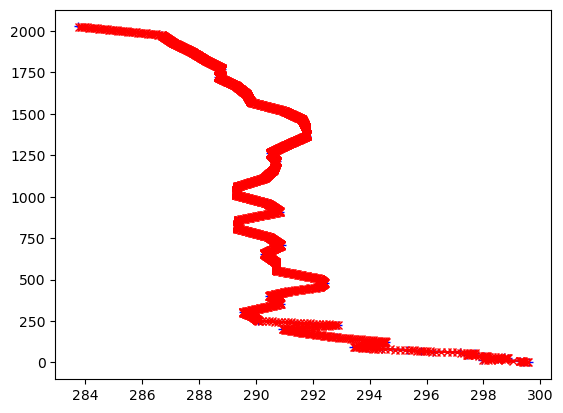

[   0.            5.04147736   10.08315553   15.12503665   20.16716399
   25.20960466   30.25241293   35.29564154   40.33934583   45.38352476
   50.42810848   55.47306522   60.51836699   65.56394672   70.60977678
   75.6558402    80.70210923   85.74856203   90.7951815    95.84196347
  100.88889604  126.12574841  151.36617954  176.61000955  201.85714595
  227.10747443  252.36098244  277.6176933   302.87755538  328.14055104
  353.40666371  378.67588618  403.94821315  429.22362295  454.50212498
  479.78374015  505.06845192  555.64707534  606.23796067  656.84118226
  707.45664772  758.08428094  808.72405744  859.37584884  910.03973342
  960.71582021 1011.40406614 1062.10438031 1112.81673252 1163.54118562
 1214.27771264 1265.0262853  1315.78692789 1366.55963783 1417.34439397
 1468.14119622 1518.95004088 1569.77086154 1620.60369707 1671.44863622
 1722.30572188 1773.17499285 1824.05636077 1874.94969451 1925.85510497
 1976.77269468 2027.70231611           nan           nan           nan
      

In [54]:
variables_to_interpolate = [
    var for var in ds_woa.data_vars
    if "Depth" in ds_woa[var].dims 
]
print(variables_to_interpolate)

# Définition de la grille régulière en pression
pressure_grid = np.arange(1, 6001, 1)

# Fonction d'interpolation pour une variable donnée
def interpolate_variable_on_pressure_grid(pres, variable):
    """
    Interpole une variable donnée sur une grille régulière de pression.
    Fonction conçue pour être utilisée avec `xarray.apply_ufunc`.
    """
    valid_mask = ~np.isnan(pres) & ~np.isnan(variable)  # Supprimer les NaN
    pres_valid = pres[valid_mask]
    variable_valid = variable[valid_mask]
    
    if len(pres_valid) > 1:
        return np.interp(pressure_grid, pres_valid, variable_valid, left=np.nan, right=np.nan)
    else:
        return np.full_like(pressure_grid, np.nan)


# Interpolation grille reguliere woa
interpolated_variables = {}
for var in variables_to_interpolate:
    interpolated_variables[var] = xr.apply_ufunc(
        interpolate_variable_on_pressure_grid,  # Fonction d'interpolation
        ds_woa["preswoa"],  # Grille de pression
        ds_woa[var],  # Variable à interpoler
        input_core_dims=[["Depth"], ["Depth"]],  # Dimensions d'entrée
        output_core_dims=[["pressure"]],  # Dimension de sortie
        vectorize=True,  # Vectorisation implicite
        dask="parallelized",  # Support de parallélisation avec Dask
        output_dtypes=[float],  # Type des données de sortie
    )

ds_woa_pres = xr.Dataset(
    {
        var: data.assign_coords(pressure=pressure_grid)
        for var, data in interpolated_variables.items()
    }
)

print('test1')
print(ds_woa['preswoa'].min().values)
print(ds_woa_pres['preswoa'].min().values)
print(ds_woa['preswoa'].max().values)
print(ds_woa_pres['preswoa'].max().values)

print('test2')
print(np.min(ds_woa['preswoa']))
print(np.min(ds_woa_pres['preswoa']))
print(np.max(ds_woa['preswoa']))
print(np.max(ds_woa_pres['preswoa']))

#print(ds_woa_pres)
plt.figure()
plt.plot(ds_woa['doxywoa'][12,:],ds_woa['preswoa'][12,:],'+b-')
plt.plot(ds_woa_pres['doxywoa'][12,:],ds_woa_pres['preswoa'][12,:],'xr-')
plt.show()
print(ds_woa['preswoa'].values[12,:])
print(ds_woa_pres['preswoa'].values[12,:])


[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
-48.68398166666667
358
198


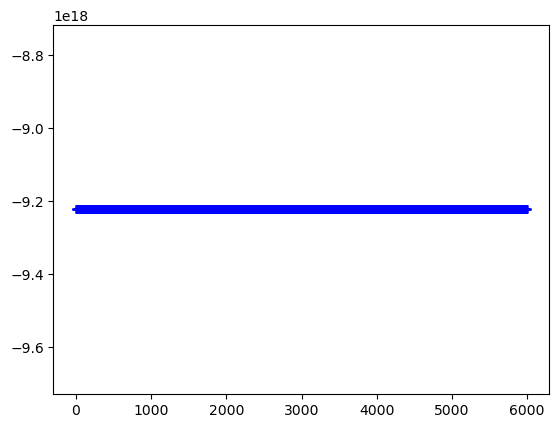

In [80]:
print(ds_woa['preswoa'][80,:].values)
print(ds_woa['lon'][80].values)
print(ds_woa['time'][80].values)
print(ds_argo_inair['JULD'][1].dt.dayofyear.values)
plt.figure()
plt.plot(ds_woa_pres['preswoa'][80,:],'+b')
plt.plot(ds_woa['preswoa'][80,:],'xr')
plt.show()

In [33]:
# Interpolation grille reguliere Sprof.
variables_to_interpolate = [
    var for var in ds_argo_Sprof.data_vars
    if "N_LEVELS" in ds_argo_Sprof[var].dims and not var.endswith("QC")
]

interpolated_variables = {}
for var in variables_to_interpolate:
    interpolated_variables[var] = xr.apply_ufunc(
        interpolate_variable_on_pressure_grid,  # Fonction d'interpolation
        ds_argo_Sprof["PRES"],  # Grille de pression
        ds_argo_Sprof[var],  # Variable à interpoler
        input_core_dims=[["N_LEVELS"], ["N_LEVELS"]],  # Dimensions d'entrée
        output_core_dims=[["pressure"]],  # Dimension de sortie
        vectorize=True,  # Vectorisation implicite
        dask="parallelized",  # Support de parallélisation avec Dask
        output_dtypes=[float],  # Type des données de sortie
    )
    
ds_Sprof_pres = xr.Dataset(
    {
        var: data.assign_coords(pressure=pressure_grid)
        for var, data in interpolated_variables.items()
    }
)
print(ds_Sprof_pres)

<xarray.Dataset>
Dimensions:              (pressure: 6000, N_PROF: 159)
Coordinates:
  * pressure             (pressure) int64 1 2 3 4 5 ... 5996 5997 5998 5999 6000
Dimensions without coordinates: N_PROF
Data variables: (12/15)
    PRES                 (N_PROF, pressure) float64 nan nan nan ... nan nan nan
    PRES_ADJUSTED        (N_PROF, pressure) float64 nan nan ... -9.223e+18
    PRES_ADJUSTED_ERROR  (N_PROF, pressure) float64 nan nan ... -9.223e+18
    TEMP                 (N_PROF, pressure) float64 nan nan nan ... nan nan nan
    TEMP_dPRES           (N_PROF, pressure) float64 nan nan nan ... nan nan nan
    TEMP_ADJUSTED        (N_PROF, pressure) float64 nan nan ... -9.223e+18
    ...                   ...
    PSAL_ADJUSTED        (N_PROF, pressure) float64 nan nan ... -9.223e+18
    PSAL_ADJUSTED_ERROR  (N_PROF, pressure) float64 nan nan ... -9.223e+18
    DOXY                 (N_PROF, pressure) float64 nan nan nan ... nan nan nan
    DOXY_dPRES           (N_PROF, pressure) fl

In [42]:
print(np.min(ds_argo_Sprof['DOXY']))
print(np.min(ds_Sprof_pres['DOXY']))
print(np.max(ds_argo_Sprof['DOXY']))
print(np.max(ds_Sprof_pres['DOXY']))

<xarray.DataArray 'DOXY' ()>
array(205.95445251)
<xarray.DataArray 'DOXY' ()>
array(205.95662789)
<xarray.DataArray 'DOXY' ()>
array(393.54495239)
<xarray.DataArray 'DOXY' ()>
array(393.38099416)


In [35]:
np.mean(ds_woa_pres['doxywoa']/ds_Sprof_pres['DOXY']).values

array(-4.20714068e+15)

In [40]:
211.15704216826987-210.78357585294117

0.3734663153286988

In [26]:
toto = ds_argo_Sprof

In [33]:
toto['N_PROF']

<xarray.DataArray 'N_PROF' (N_PROF: 159)>
array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
       112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158])
Dimensions without coordinates: N_PROF

In [27]:
np.arange(1, 6001, 1)

array([   1,    2,    3, ..., 5998, 5999, 6000])

In [31]:
#toto= toto.assign_coords(pressure=np.arange(1, 6001, 1))
toto  = toto.assign_coords(PRES=(["N_PROF","N_LEVELS"],toto['PRES'].values))
toto

<xarray.Dataset>
Dimensions:                       (N_PROF: 159, N_PARAM: 4, N_CALIB: 2,
                                   N_LEVELS: 2005)
Coordinates:
    PRES                          (N_PROF, N_LEVELS) float32 15.7 16.0 ... nan
Dimensions without coordinates: N_PROF, N_PARAM, N_CALIB, N_LEVELS
Data variables: (12/57)
    DATA_TYPE                     <U32 ...
    FORMAT_VERSION                <U4 ...
    HANDBOOK_VERSION              <U4 ...
    REFERENCE_DATE_TIME           datetime64[ns] ...
    DATE_CREATION                 datetime64[ns] ...
    DATE_UPDATE                   datetime64[ns] ...
    ...                            ...
    DOXY                          (N_PROF, N_LEVELS) float32 ...
    DOXY_QC                       (N_PROF, N_LEVELS) int64 ...
    DOXY_dPRES                    (N_PROF, N_LEVELS) float32 ...
    DOXY_ADJUSTED                 (N_PROF, N_LEVELS) float32 ...
    DOXY_ADJUSTED_QC              (N_PROF, N_LEVELS) int64 ...
    DOXY_ADJUSTED_ERROR           (N_PROF, N_LEVELS) float32 ...
Attributes:
    title:                Argo float vertical profile
    institution:          CORIOLIS
    source:               Argo float
    history:              2023-03-20T16:17:04Z creation (software version 1.1...
    references:           http://www.argodatamgt.org/Documentation
    user_manual_version:  1.0
    Conventions:          Argo-3.1 CF-1.6
    featureType:          trajectoryProfile
    software_version:     1.15 (version 09.06.2022 for ARGO_simplified_profile)

In [32]:
toto2 = toto.interp(PRES=np.arange(1, 6001, 1))
toto2

ValueError: Dimensions {'PRES'} do not exist. Expected one or more of Frozen({'N_PROF': 159, 'N_PARAM': 4, 'N_CALIB': 2, 'N_LEVELS': 2005})

In [30]:
ds_meta = xr.open_dataset('/Users/chemon/ARGO_NEW/NEW_LOCODOX/data_test/6902802/6902802_meta.nc')
ds_meta

<xarray.Dataset>
Dimensions:                               (N_TRANS_SYSTEM: 1,
                                           N_POSITIONING_SYSTEM: 2,
                                           N_LAUNCH_CONFIG_PARAM: 55,
                                           N_CONFIG_PARAM: 14, N_MISSIONS: 4,
                                           N_SENSOR: 5, N_PARAM: 9)
Dimensions without coordinates: N_TRANS_SYSTEM, N_POSITIONING_SYSTEM,
                                N_LAUNCH_CONFIG_PARAM, N_CONFIG_PARAM,
                                N_MISSIONS, N_SENSOR, N_PARAM
Data variables: (12/65)
    DATA_TYPE                             object ...
    FORMAT_VERSION                        object ...
    HANDBOOK_VERSION                      object ...
    DATE_CREATION                         object ...
    DATE_UPDATE                           object ...
    PLATFORM_NUMBER                       object ...
    ...                                    ...
    PARAMETER_UNITS                       (N_PARAM) object ...
    PARAMETER_ACCURACY                    (N_PARAM) object ...
    PARAMETER_RESOLUTION                  (N_PARAM) object ...
    PREDEPLOYMENT_CALIB_EQUATION          (N_PARAM) object ...
    PREDEPLOYMENT_CALIB_COEFFICIENT       (N_PARAM) object ...
    PREDEPLOYMENT_CALIB_COMMENT           (N_PARAM) object ...
Attributes:
    title:                Argo float metadata file
    institution:          CORIOLIS
    source:               Argo float
    history:              2022-11-25T14:58:20Z creation; 2024-01-26T10:28:52Z...
    references:           http://www.argodatamgt.org/Documentation
    user_manual_version:  3.1
    Conventions:          Argo-3.1 CF-1.6
    decoder_version:      CODA_053d

In [41]:
ds_meta['LAUNCH_CONFIG_PARAMETER_NAME'][22:25].values

array([b'CONFIG_InAirMeasurementPeriodicity_NUMBER                                                                                       ',
       b'CONFIG_InAirMeasurementSamplingPeriod_seconds                                                                                   ',
       b'CONFIG_InAirMeasurementTime_minutes                                                                                             '],
      dtype=object)

In [42]:
ds_meta['LAUNCH_CONFIG_PARAMETER_VALUE'][22:25].values

array([ 2., 30.,  5.])

In [44]:
ds_meta['CONFIG_PARAMETER_NAME'][12].values

array(b'CONFIG_InAirMeasurementPeriodicity_NUMBER                                                                                       ',
      dtype=object)

In [47]:
ds_meta['CONFIG_PARAMETER_VALUE'][:,12].values

array([2., 2., 1., 1.])